In [1]:
#Modules used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture

In [2]:
#We read data into a pandas dataframe
boston = pd.read_csv('boston housing.csv')

In [3]:
#Since we are clustering data, we don't have to perform feature reduction. Instead we are going to introduce dummy variables.
boston["RAD"]=boston["RAD"].astype("category")

In [4]:
#1-hot encoding of RAD variable; because it is categorical variable
#we are using df.get_dummies() to drop the original column and pick the categorical variable and apply 1-hot encoding

boston["RAD"]=boston["RAD"].astype("category")
boston=pd.get_dummies(boston,prefix="RAD")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PT,...,MV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,296,15.300000,...,24.000000,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,242,17.799999,...,21.600000,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,242,17.799999,...,34.700001,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,222,18.700001,...,33.400002,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,222,18.700001,...,36.200001,0,0,1,0,0,0,0,0,0


In [5]:
#We are going to Scale the entire Dataset

scaler=MinMaxScaler();
scaler=scaler.fit(boston)

scaledData=scaler.transform(boston)

In [6]:
#Creating a scaled dataset

data=pd.DataFrame(scaledData,columns=boston.columns)


In [7]:
#Viewing the dataset after scaling
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PT,...,MV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,...,0.422222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,...,0.368889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,...,0.660000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,...,0.631111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,...,0.693333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.164122,0.893617,...,0.386667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.164122,0.893617,...,0.346667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.164122,0.893617,...,0.420000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.164122,0.893617,...,0.377778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#We define variables k_knn and k_gmm to store optimal k values of kmeans and gmm models
#We are iterating over different k values, and computing the silhouette coefficient value for each k value.
#We will chose the k value that produces the highest coefficient as the most optimal k
#We are setting a random state so there is no variation each time the program is run

maxk = 0
maxg = 0
k_knn = 0
k_gmm = 0

for k in range(2,25):
    
    #perforiming  the KMeans cluster configuration
    kmeans=KMeans(n_clusters=k,random_state=4).fit(data)
    
    # Fit the model 
    label = kmeans.labels_
    
    # Calculate and print Silhoutte Score for KMeans model
    sil_coeff = silhouette_score(data, label, metric = 'euclidean')
    
    #Finding maximum coefficient value
    if sil_coeff > maxk:
        maxk = sil_coeff
        k_knn = int(k)
    print("KNN : For n_clusters = {}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    
    #perforiming  the GMM cluster configuration
    gmm = GaussianMixture(n_components=k, random_state = 4)
    
    # Fit the model 
    labels = gmm.fit_predict(data)
    
    # Calculate and print Silhoutte Score for GMM model 
    sil_coeff_1 = silhouette_score(data, labels, metric='euclidean')
    
    #Finding maximum coefficient value
    if sil_coeff_1 > maxg:
        maxg = sil_coeff_1
        k_gmm = int(k)
    print("GMM : For n_clusters = {}, The Silhouette Coefficient is {}".format(k, sil_coeff_1))


KNN : For n_clusters = 2, The Silhouette Coefficient is 0.30770390830086597
GMM : For n_clusters = 2, The Silhouette Coefficient is 0.3062227232751623
KNN : For n_clusters = 3, The Silhouette Coefficient is 0.32662865167563176
GMM : For n_clusters = 3, The Silhouette Coefficient is 0.32487607725139167
KNN : For n_clusters = 4, The Silhouette Coefficient is 0.3865161925007773
GMM : For n_clusters = 4, The Silhouette Coefficient is 0.3865161925007773
KNN : For n_clusters = 5, The Silhouette Coefficient is 0.4120121357679621
GMM : For n_clusters = 5, The Silhouette Coefficient is 0.4065297439803802
KNN : For n_clusters = 6, The Silhouette Coefficient is 0.4354053777544648
GMM : For n_clusters = 6, The Silhouette Coefficient is 0.42187817050473947
KNN : For n_clusters = 7, The Silhouette Coefficient is 0.45929092970327845
GMM : For n_clusters = 7, The Silhouette Coefficient is 0.3986928981119174
KNN : For n_clusters = 8, The Silhouette Coefficient is 0.4407203129583849
GMM : For n_clusters

In [9]:
#Displaying optimal k value for Kmeans

print(k_knn)

7


In [10]:
#Displaying optimal k value for GMM model

print(k_gmm)

8


In [11]:
#We configure and fit model using optimal k value and the same random state as we did earlier
#labels, labels_1 contain category data for each row

kmeans = KMeans(n_clusters=k_knn,max_iter=500,random_state=4).fit(data)
labels =kmeans.labels_

gmm = GaussianMixture(n_components=k_gmm, max_iter = 500, random_state = 4)
gmm.fit(data)

labels_1 = gmm.predict(data)



In [12]:
#We perform inverse Scaling because we are interested in working with the original data again (to save as .csv)
originalDataAsNumpy=scaler.inverse_transform(data)

#converting numpy to pandas dataframe
Final=pd.DataFrame(originalDataAsNumpy,columns=data.columns)

#adding the 2 category columns labelled columns to the Final
Final["KMeans_cluster"]= labels
Final["GMM_cluster"] = labels_1

#saving data on the system as FinalData.csv
Final.to_csv("FinalData.csv")


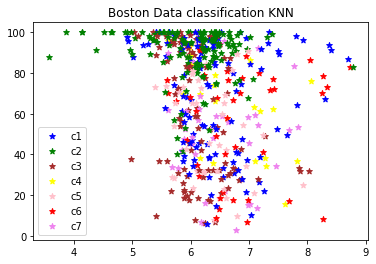

In [13]:
#We use some arbitrary axis values to produce a scatter plot to map all the data 
#in the Boston Housing dataset according to Kmean cluster

length=Final.shape[0]

for i in range(0, length):
    if Final.KMeans_cluster[i] == 0:
      c1 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='blue', marker='*')
    elif Final.KMeans_cluster[i]  == 1:
      c2 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='green',marker='*')
    elif Final.KMeans_cluster[i]  == 2:
      c3 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='brown',marker='*')
    elif Final.KMeans_cluster[i] == 3:
      c4 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='yellow',marker='*')
    elif Final.KMeans_cluster[i]  == 4:
      c5 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='pink',marker='*')
    elif Final.KMeans_cluster[i]  == 5:
      c6 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='red',marker='*')
    elif Final.KMeans_cluster[i] == 6:
      c7 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='violet',marker='*')
    #elif Final.KMeans_cluster[i]  == 7:
    #  c8 = pl.scatter(Final.iloc[i,5],Final.iloc[i,6],c='orange',marker='*')
    #elif Final.KMeans_cluster[i]  == 8:
    #  c9 = pl.scatter(Final.iloc[i,5],Final.iloc[i,6],c='purple',marker='*')
    
plt.legend([c1,c2,c3,c4,c5,c6,c7], ['c1','c2','c3','c4','c5','c6','c7'])  
plt.title('Boston Data classification KNN')
plt.show()

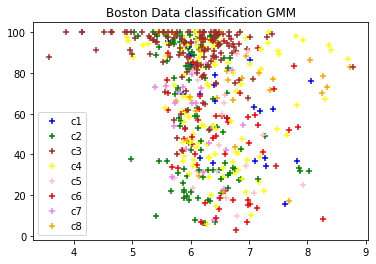

In [14]:
#We use some arbitrary axis values to produce a scatter plot to map all the data 
#in the Boston Housing dataset according to GMM cluster

for i in range(0, length):
    if Final.GMM_cluster[i] == 0:
      c1 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='blue', marker='+')
    elif Final.GMM_cluster[i]  == 1:
      c2 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='green',marker='+')
    elif Final.GMM_cluster[i]  == 2:
      c3 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='brown',marker='+')
    elif Final.GMM_cluster[i] == 3:
      c4 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='yellow',marker='+')
    elif Final.GMM_cluster[i]  == 4:
      c5 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='pink',marker='+')
    elif Final.GMM_cluster[i]  == 5:
      c6 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='red',marker='+')
    elif Final.GMM_cluster[i] == 6:
      c7 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='violet',marker='+')
    elif Final.GMM_cluster[i]  == 7:
      c8 = plt.scatter(Final.iloc[i,5],Final.iloc[i,6],c='orange',marker='+')

    

plt.legend([c1,c2,c3,c4,c5,c6,c7,c8], ['c1','c2','c3','c4','c5','c6','c7','c8'])  
plt.title('Boston Data classification GMM')
plt.show()

In [15]:
#We verify the similarity of the 2 clustering methods, and we find that they are only ~96% similar, 
#even though they were trained on identical data(including random state)

adjusted_rand_score(labels, labels_1)

0.9594799507943065